# Search algorithms comparison notebook
In this notebook, we compare between the three main algorithms shown in the paper "Assessing and Remedying Coverage for a Given Dataset", by Abolfazl Asudeh, Zhongjun Jin, H. V. Jagadish from the university of Michigan.
The implementations themselves can be found in the source code.

In short, the three algorithms follow different graph traversals of the pattern graph for given data-set, built according the the above paper.
The algorithms we compare:
* PatternBreaker: The top-down level-by-level approach.
* PatternCombiner: The bottom-up level-by-level approach.
* DeepDiver: The most advance approach, that performs an enhanced Depth-based search approach.

More about these algorithms can be read in the article, and the implementations attached in the source code.

## Imports

In [1]:
# Imports
from patternBreaker import PatternBreaker
from patternCombiner import PatternCombiner
from DeepDiver import DeepDiver

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Functions definition

In [ ]:
def run_algorithms(file_name, attributes, threshold, print_mups=False, plot=False):
    pattern_breaker = PatternBreaker(file_name, threshold, attributes, True)
    mups_pattern_breaker = pattern_breaker.find_max_uncovered_pattern_set()
    print(f'---------------- {pattern_breaker.__class__.__name__} ----------------')
    print(f'There are {pattern_breaker.debugger.get_num_of_mups()} MUPs!\n')
    print(f'Execution time: {pattern_breaker.debugger.get_execution_time()} seconds')
    print(f'Total patterns visited: {pattern_breaker.debugger.get_node_visited()}')
    if print_mups:
        for mup in mups_pattern_breaker:
            print(mup)
    print(f'---------------------------------------------------------\n')

    pattern_combiner = PatternCombiner(file_name, threshold, attributes, True)
    mups_pattern_combiner = pattern_combiner.find_max_uncovered_pattern_set()
    print(f'---------------- {pattern_combiner.__class__.__name__} ----------------')
    print(f'There are {pattern_combiner.debugger.get_num_of_mups()} MUPs!\n')
    print(f'Execution time: {pattern_combiner.debugger.get_execution_time()} seconds')
    print(f'Total patterns visited: {pattern_combiner.debugger.get_node_visited()}')
    if print_mups:
        for mup in mups_pattern_breaker:
            print(mup)
    print(f'---------------------------------------------------------\n')

    deep_diver = DeepDiver(file_name, threshold, attributes, True)
    mups_deep_diver = deep_diver.find_max_uncovered_pattern_set()
    print(f'---------------- {deep_diver.__class__.__name__} ----------------')
    print(f'There are {deep_diver.debugger.get_num_of_mups()} MUPs!\n')
    print(f'Execution time: {deep_diver.debugger.get_execution_time()} seconds')
    print(f'Total patterns visited: {deep_diver.debugger.get_node_visited()}')
    if print_mups:
        for mup in mups_pattern_breaker:
            print(mup)
    print(f'---------------------------------------------------------\n')

    # Sanity check
    assert len(mups_pattern_breaker) == len(mups_pattern_combiner) == len(mups_deep_diver)

    if plot:
        # data
        x = ['Pattern Breaker', 'Pattern Combiner', 'Deep Diver']
        y = [pattern_breaker.debugger.get_execution_time(), pattern_combiner.debugger.get_execution_time(), deep_diver.debugger.get_execution_time()]

        # plot
        fig, ax = plt.subplots()
        ax.bar(x, y, color='skyblue', align='center', width=0.5)
        plt.ylabel('Execution time (s)')
        plt.title('Execution time comparison')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.legend(['Execution time'])
        plt.show()

    return (pattern_breaker.debugger.get_execution_time(), pattern_combiner.debugger.get_execution_time(), deep_diver.debugger.get_execution_time()), (pattern_breaker.debugger.get_num_of_mups(), pattern_combiner.debugger.get_num_of_mups(), deep_diver.debugger.get_num_of_mups()), (pattern_breaker.debugger.get_node_visited(), pattern_combiner.debugger.get_node_visited(), deep_diver.debugger.get_node_visited())

def collect_data_several_thresholds(attributes, thresholds):
    data = []
    for threshold in thresholds:
        print(f'Running algorithms for threshold {threshold}...')
        data.append(run_algorithms('airbnb_100000.csv', attributes, threshold))
    return data

def prot_several_thresholds(data, thresholds):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    x = np.array(thresholds)
    y1 = [d[0][0] for d in data]  # Pattern Breaker execution time
    y2 = [d[0][1] for d in data]  # Pattern Combiner execution time
    y3 = [d[0][2] for d in data]  # Deep Diver execution time
    y4 = [d[1][0] for d in data]  # Number of MUPs - same for all algorithms

    # Plot execution time lines
    line1, = ax.plot(x, y1, color='skyblue', marker='o', markerfacecolor='none', label='Pattern Breaker')
    line2, = ax.plot(x, y2, color='green', marker='^', markerfacecolor='none', label='Pattern Combiner')
    line3, = ax.plot(x, y3, color='red', marker='s', markerfacecolor='none', label='Deep Diver')

    # Plot bars with corrected widths
    bars = ax2.bar(x, y4, width=x*0.05, color='purple', alpha=0.5, align='center', label='Number of MUPs')

    # Set log scale
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Labels and title
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Execution time (s)', color='black')
    ax2.set_ylabel('Number of MUPs', color='black')
    plt.title('Execution time and number of MUPs comparison')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Combine legends
    lines = [line1, line2, line3]
    bar_legend = plt.Line2D([0], [0], color='purple', alpha=0.99, linewidth=2, label='Number of MUPs')
    ax.legend(lines + [bar_legend], [l.get_label() for l in lines] + ['Number of MUPs'], loc='upper right')

    plt.show()


## Experiments
Plots comparing the search algorithms, over several thresholds on the larger `airbnb_100000.csv` data-set.

### Big exp
attributes = [3,4,5,6,7,8,9,10]

thresholds = [3,5,7,10,15,20,25,50,70,100,150,250,350,500,1000]

In [ ]:
attributes = [3,4,5,6,7,8,9,10]
thresholds = [3,5,7,10,15,20,25,50,70,100,150,250,350,500,1000]
data = collect_data_several_thresholds(attributes, thresholds)

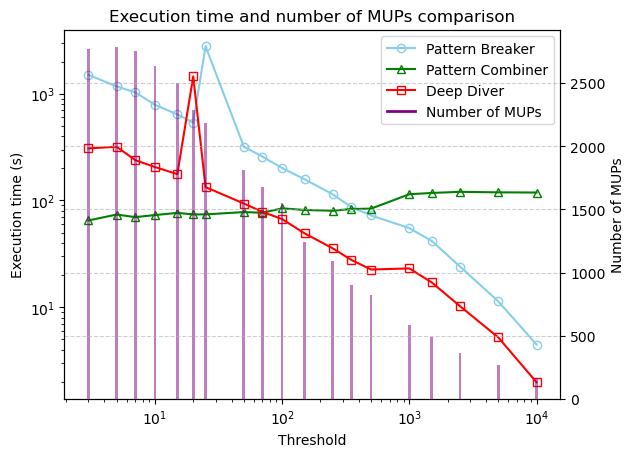

In [ ]:
prot_several_thresholds(data, thresholds)

## Experiments
Plots comparing the search algorithms, for one threshold on different partitions of the data

### Exp
File: airbnb_1000.csv

Attributes: [1,2,3]

Threshold: 3


      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [1,2,3]
        Threshold: 3
        -------------------
      
---------------- PatternBreaker ----------------
There are 370 MUPs!

Execution time: 0.5769977569580078 seconds
Total patterns visited: 555
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 370 MUPs!

Execution time: 0.5980463027954102 seconds
Total patterns visited: 2842
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 370 MUPs!

Execution time: 0.6600861549377441 seconds
Total patterns visited: 1332
---------------------------------------------------------



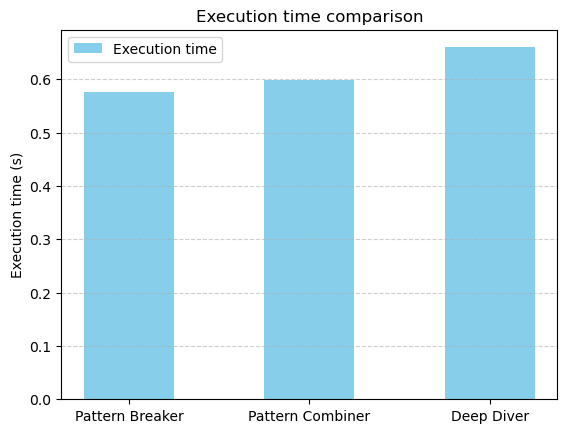

In [3]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [1,2,3]
        Threshold: 3
        -------------------
      """)
run_algorithms('airbnb_1000.csv', [1,2,3], 3)

### Exp
File: airbnb_100000.csv

Attributes: [1,2,3]

Threshold: 5


      Running experiment:
        -------------------
        File: airbnb_100000.csv
        Attributes: [1,2,3]
        Threshold: 5
        -------------------
      
---------------- PatternBreaker ----------------
There are 798 MUPs!

Execution time: 2.509307861328125 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 798 MUPs!

Execution time: 5.5328240394592285 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 798 MUPs!

Execution time: 5.6848039627075195 seconds
---------------------------------------------------------



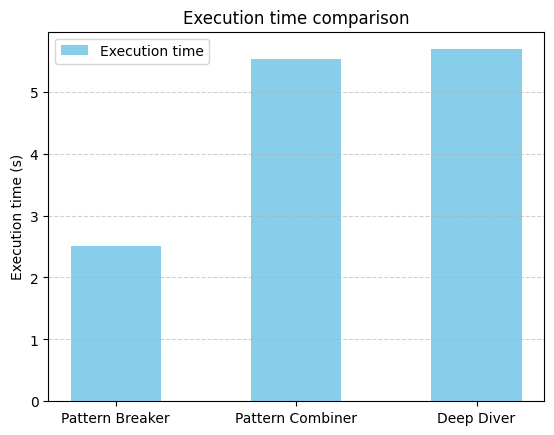

In [23]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_100000.csv
        Attributes: [1,2,3]
        Threshold: 5
        -------------------
      """)
run_algorithms('airbnb_100000.csv', [1,2,3], 5)

### Exp:
File: airbnb_100000.csv

Attributes: [1,2,3]

Threshold: 3


      Running experiment:
        -------------------
        File: airbnb_100000.csv
        Attributes: [1,2,3]
        Threshold: 3
        -------------------
      
---------------- PatternBreaker ----------------
There are 953 MUPs!

Execution time: 3.2521071434020996 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 953 MUPs!

Execution time: 5.421238899230957 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 953 MUPs!

Execution time: 7.34962272644043 seconds
---------------------------------------------------------



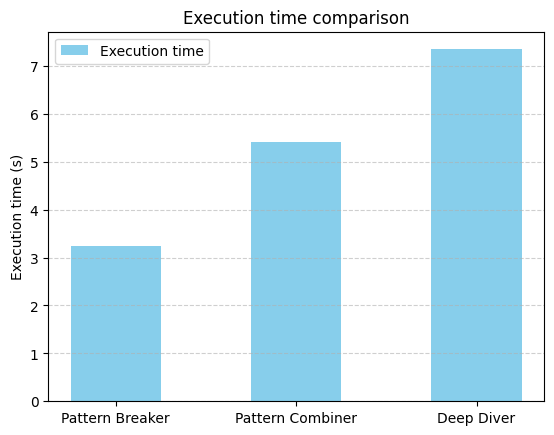

In [24]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_100000.csv
        Attributes: [1,2,3]
        Threshold: 3
        -------------------
      """)
run_algorithms('airbnb_100000.csv', [1,2,3], 3)

### Exp:
File: airbnb_100000.csv

Attributes: [1,2,3,4]

Threshold: 4


      Running experiment:
        -------------------
        File: airbnb_100000.csv
        Attributes: [1,2,3,4]
        Threshold: 4
        -------------------
      
---------------- PatternBreaker ----------------
There are 4510 MUPs!

Execution time: 53.54670214653015 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 4510 MUPs!

Execution time: 127.80317282676697 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 4510 MUPs!

Execution time: 103.77862238883972 seconds
---------------------------------------------------------



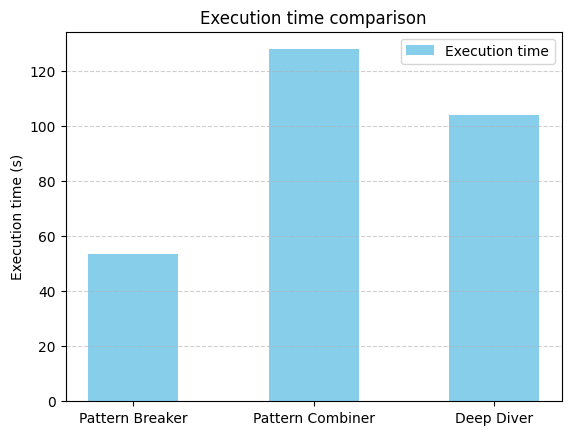

In [25]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_100000.csv
        Attributes: [1,2,3,4]
        Threshold: 4
        -------------------
      """)
run_algorithms('airbnb_100000.csv', [1,2,3,4], 4)

### Exp:
File: airbnb_1000.csv

Attributes: [1,2,3,4,5,6]

Threshold: 4


      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [1,2,3,4]
        Threshold: 4
        -------------------
      
---------------- PatternBreaker ----------------
There are 1058 MUPs!

Execution time: 4.9779040813446045 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 1058 MUPs!

Execution time: 93.19139003753662 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 1058 MUPs!

Execution time: 8.991353750228882 seconds
---------------------------------------------------------



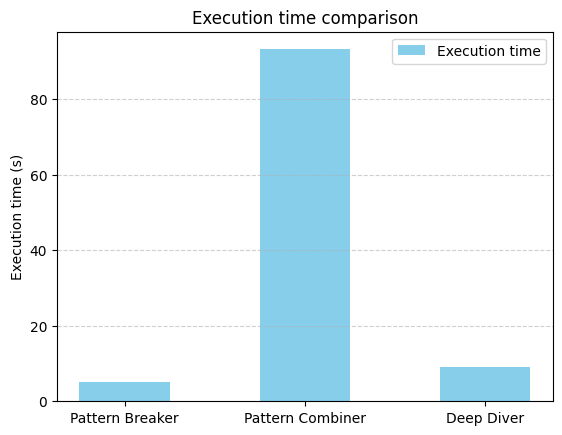

In [26]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [1,2,3,4,5,6]
        Threshold: 4
        -------------------
      """)
run_algorithms('airbnb_1000.csv', [1,2,3,4,5,6], 4)

### Exp:
File: airbnb_1000.csv

Attributes: [3,4,5,6,7,8,9,10]

Threshold: 4


      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 4
        -------------------
      
---------------- PatternBreaker ----------------
There are 719 MUPs!

Execution time: 35.58738994598389 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 719 MUPs!

Execution time: 19.80960512161255 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 719 MUPs!

Execution time: 14.757298946380615 seconds
---------------------------------------------------------



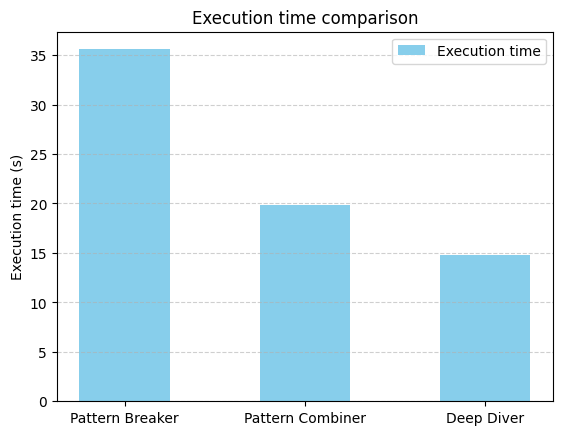

In [27]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 4
        -------------------
      """)
run_algorithms('airbnb_1000.csv', [3,4,5,6,7,8,9,10], 4)

### Exp:
File: airbnb_1000.csv

Attributes: [3,4,5,6,7,8,9,10]

Threshold: 5


      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 5
        -------------------
      
---------------- PatternBreaker ----------------
There are 680 MUPs!

Execution time: 27.034843921661377 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 680 MUPs!

Execution time: 20.272253036499023 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 680 MUPs!

Execution time: 13.849577903747559 seconds
---------------------------------------------------------



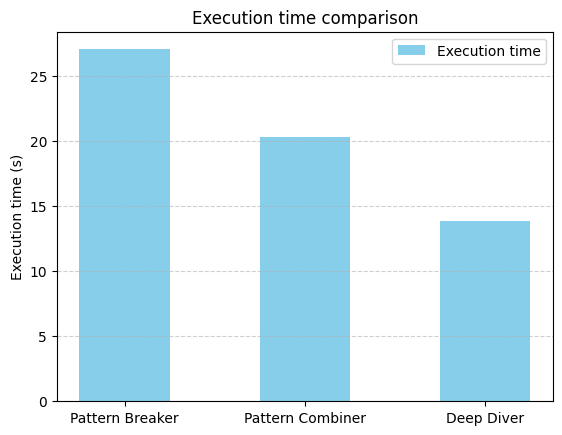

In [28]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 5
        -------------------
      """)
run_algorithms('airbnb_1000.csv', [3,4,5,6,7,8,9,10], 5)

### Exp:
File: airbnb_1000.csv

Attributes: [3,4,5,6,7,8,9,10]

Threshold: 6


      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 6
        -------------------
      
---------------- PatternBreaker ----------------
There are 656 MUPs!

Execution time: 22.893080711364746 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 656 MUPs!

Execution time: 20.27326798439026 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 656 MUPs!

Execution time: 11.375972270965576 seconds
---------------------------------------------------------



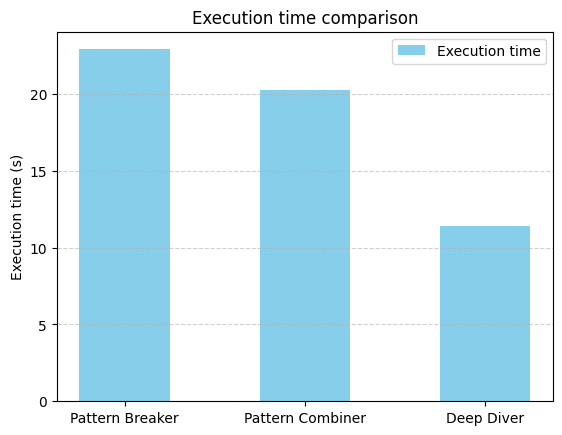

In [29]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 6
        -------------------
      """)
run_algorithms('airbnb_1000.csv', [3,4,5,6,7,8,9,10], 6)

### Exp:
File: airbnb_1000.csv

Attributes: [3,4,5,6,7,8,9,10]

Threshold: 7


      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 7
        -------------------
      
---------------- PatternBreaker ----------------
There are 601 MUPs!

Execution time: 19.331829071044922 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 601 MUPs!

Execution time: 20.25956106185913 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 601 MUPs!

Execution time: 10.340761184692383 seconds
---------------------------------------------------------



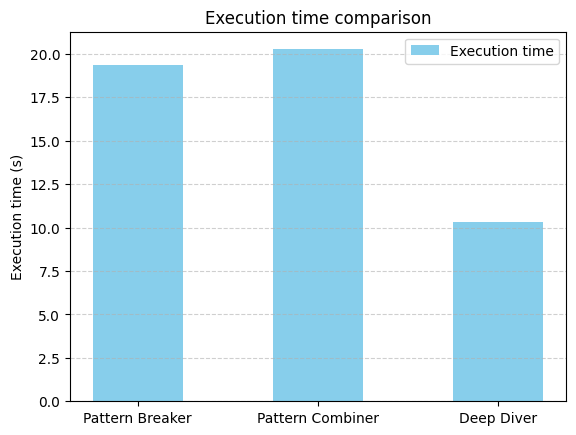

In [30]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 7
        -------------------
      """)
run_algorithms('airbnb_1000.csv', [3,4,5,6,7,8,9,10], 7)

### Exp:
File: airbnb_1000.csv

Attributes: [3,4,5,6,7,8,9,10]

Threshold: 7


      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 7
        -------------------
      
---------------- PatternBreaker ----------------
There are 3720 MUPs!

Execution time: 1814.3396100997925 seconds
---------------------------------------------------------

---------------- PatternCombiner ----------------
There are 3720 MUPs!

Execution time: 690.7679531574249 seconds
---------------------------------------------------------

---------------- DeepDiver ----------------
There are 3720 MUPs!

Execution time: 501.49116683006287 seconds
---------------------------------------------------------



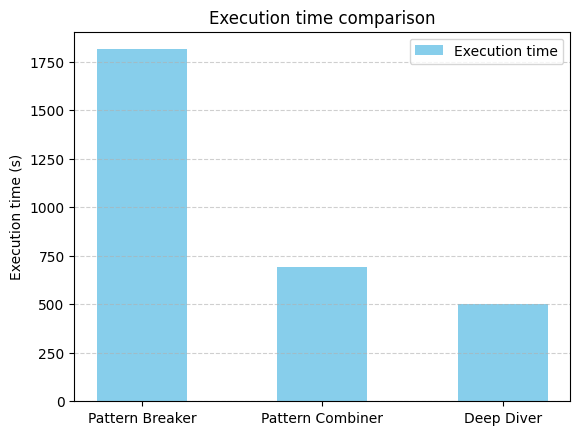

In [31]:
print(f"""
      Running experiment:
        -------------------
        File: airbnb_1000.csv
        Attributes: [3,4,5,6,7,8,9,10]
        Threshold: 7
        -------------------
      """)
run_algorithms('airbnb_1000.csv', [3,4,5,6,7,8,9,10,11,12,13], 7)

### Exp:


# Stuff to do:
- Add thresholds 1 and 2 - try to get diamond shape.
- Generate more big plots, from different attributes
- Add a text section that compares our results to the paper's results